# Pairs Trading with Copula Approach

## References
- Slides: Introduction to Copula-Based Pairs Trading Strategy. https://docs.google.com/presentation/d/19xUNdddCsdXg2KizcUMVvdjhTnA8Cuq293brXB8rSWM/edit#slide=id.p
- Copula for Pairs Trading: A Unified Overview of Common Strategies. https://hudsonthames.org/copula-for-pairs-trading-overview-of-common-strategies/
- 🌟Pairs Trading: Copulas VS Cointegration. https://www.quantconnect.com/learning/articles/investment-strategy-library/pairs-trading-copula-vs-cointegration
- Copula Strategy: Variations In The Mispricing Index Trading. https://docs.google.com/presentation/d/1FgEkCuiCh2Jg6aS5J-bYFoBDWUygEcN0GA5YSM52m_o/edit#slide=id.p1
- Pairs trading with Copulas. https://efmaefm.org/0efmameetings/EFMA%20ANNUAL%20MEETINGS/2014-Rome/papers/EFMA2014_0222_FullPaper.pdf
- The profitability of pairs trading strategies: distance, cointegration and copula methods. https://www.tandfonline.com/doi/abs/10.1080/14697688.2016.1164337?casa_token=i9PYPDpq4ssAAAAA%3A-Jft2sesf5R_peaiSI9JfiB890w_NBz_U24Z4-gcVpIkd-yX1b2hUac0SYMxSonmQFJIkwSlbYrboA&journalCode=rquf20
- kendall rank correlation tau. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html#scipy.stats.kendalltau
- 🌟基于Copula函数的配对交易. https://toutiao.io/posts/5d7v7le/preview
- Model and Formula: Copula (probability theory).https://en.wikipedia.org/wiki/Copula_(probability_theory)

## Copula
- A good way to model **tail dependency**,part of non-linearity
- Means *Chains* or *Link* in Latin way.

### Mathmetical Concept
- Get data from two RV, denoted as $S_1$ and $S_2$. 
  - in finance field, we can think $S_1$ and $S_2$ as prices or returns
- Use <u>marginal cumulative density function</u> maps to *quantiles* $U_1$ and $U_2$: $P(U_1≤u_1, U_2≤u_2)=C(u_1,u_2)=\frac{𝛛^2C(u_1,u_2)}{𝛛u_2}$
  - This formula is used for log maximum likelihood fitting for copulas.
  - $U_1$ and $U_2$ are uniformed between 0 and 1.
  - <u>Conditional Proability</u>: used for **trading** mostly
    - $P(U_1≤u_1|U_2=u_2):=\frac{𝛛C(u_1,u_2)}{𝛛u_2}$
      - $P(U_1≤u_1|U_2=u_2)< 0.5$→Stock 1 is undervalued.
      - $P(U_1≤u_1|U_2=u_2)> 0.5$→Stock 1 is overvalued.
    - $P(U_2≤u_2|U_1=u_1):=\frac{𝛛C(u_1,u_2)}{𝛛u_1}$

## Application in Trading 
### Strategy1: Simple Threshold on Prices
- $Spread=h_1S_1-h_2S_2$
- Trading Signal: Usually, we set $c=0.5$ as threshold.
  - if $P(U_1≤u_1|U_2=u_2)<= c$ and $P(U_1≤u_1|U_1=u_1)>= 1-c$ → **Long** the spread. Namely, buy $S_1$, sell $S_2$.
    - $S_1$ undervalued, $S_2$ overvalued
  - if $P(U_2≤u_2|U_1=u_1)<= c$ and $P(U_1≤u_1|U_2=u_2)>= 1-c$ → **Short** the spread. Namely, buy $S_2$, sell $S_1$.
    - $S_2$ undervalued, $S_1$ overvalued
  - if <u>both</u> cdf cross $c$ → **Exit** the position
- Evaluation:
  - Disadvantages: 
    1. prices are non-stationary
    2. Some cases time series are difficult to fit
      - local aggregations 
      - asymmetry
    - Solutions: 
      - use returns to model instead of prices
  - Advantages:
    1. simple and easy to understand
    2. if we choose right pairs, there exists a robust performance

### Strategy2: Mispricing Index on Returns
- **Mispricing Index (MPI)**: conditional probability of returns
  - $MI_t^{X|Y}=P(R_t^X < r_t^X|R_t^Y < r_t^Y)$
  - $MI_t^{Y|X}=P(R_t^Y < r_t^Y|R_t^X < r_t^X)$
    - $r$: observed data
- **Flag: Cumulative MPI (CMPI)**
  - $FlagX^*(t)=FlagX*(t-1)+(MI_t^{X|Y}-0.5)$, $FlagX^*(0)=0$
  - $FlagY^*(t)=FlagY*(t-1)+(MI_t^{Y|X}-0.5)$, $FlagY^*(0)=0$
    - 0.5 represents the *average*
  - if there is an <u>exit position</u>, the real flag series $FlagX(t)$ and $FlagY(t)$ will be reset to 0.
- Trading Signal: under dollar neutral strategy
  1. Open Rules(OR logic)
    - $FlagX$ reaches $0.6$ → short $X$ and buy $Y$
      - StockX is overvalued
    - $FlagX$ reaches $-0.6$→ short $Y$ and buy $X$
      - StockX is undervalued
    - $FlagY$ reaches $0.6$ → short $Y$ and buy $X$
    - $FlagY$ reaches $-0.6$→ short $X$ and buy $Y$
  2. Exit Rules: No long mispricing (OR logic)
    - Close $FlagX$ if returns come to $0$ or $±2$, when trading based on X.
    - Close $FlagY$ if returns come to $0$ or $±2$, when trading based on Y.
  3. Reset Rule: Update the evaluation
    - when there is an exit position, reset flags to $0$.
- Evaluation:
  - Disadvantages:
    1. The series are highly model dependent, the results are different based on different copula model choosen.
      - Solution: use $AIC$ and $BIC$ statistics to select best fitting copula
        - $AIC=-2L(θ)+2k$
          - $k$: number of parameters
          - $L(θ)=\sum_{t=1}^T log_c(u_t, v_t;θ)$, maximum log-likelihood function 
        - $BIC=-2ln(θ)+kln(N)$
          - $N$: number of data points
    2. Not necessarily driven by mean-reverting.
    3. Sometimes the strategy trading is too sensitive for position changes.
- Improvement: Alternative Strategy Signals for MPI
  1. More Stable Method: 
    - Set open rules of trading signal to `AND` logic, instead of OR. 
    - Set the Exit rule to if `EITHER` flag series crosses with $0$.
    - DO NOT define the reset rule.
      - it is more stable even if in bearish markets
      - While, it generates *less returns* than coint or distance approach overall.
  2. Bollinger Bond Variation
    - Trading Threshold:
      - Overpriced when > $movingavg+std*k$(upper bound)
      - Underpriced when < $ movingavg- std*k$ (lower bound)
    - Trading Strategy:
      - Open:
        - Short: $X$ is overpriced OR $Y$ is underpriced
        - Long: $X$ is underpriced OR $Y$ is overpriced
      - Exit:
        - if EITHER flag series crosses with mean.
    - Evaluation:
      - Disadvantages: exit too frequent
      - Advantages:
        - use less copula method without model dependency
        - keep mean-reverting
        - self-adaptive


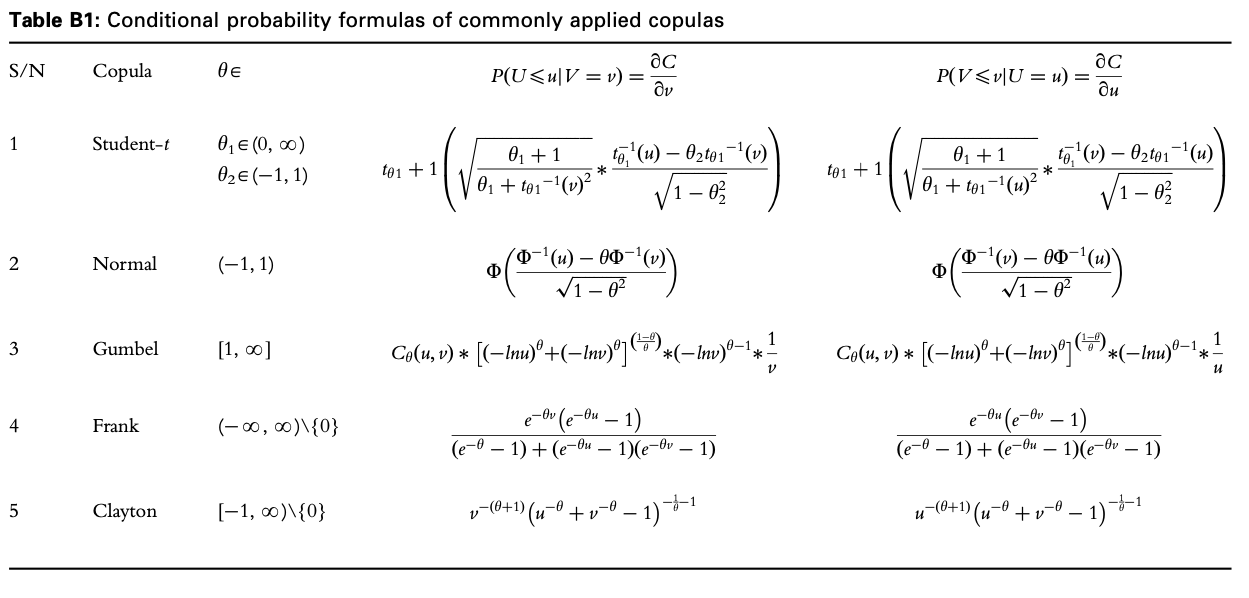

## Pairs Selection

### 1. Estimite marginal distributions of log returns
- Calculation: $R_t=ln(\frac{P_t}{P_{t-1}})$
- Use `ECDF` function in `statsmodel` library.

### 2. Test whether the series data is normally distributed
- Use Ljung-Box test

### 3. Select porper correlation indicator
- iid→ Pearson Correlation
- not iid→Choose Kendall Rank Correlation
  - $𝜏=\frac{n_c-n_d}{\frac{1}{2}n(n-1)}$
    - $n_c$: number of concordant
    - $n_d$: number of discordant
- Ranking with the correlation scores, we choose stock pairs with high scores.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
!pip install yfinance
import yfinance as yf
!pip install pyfolio
import pyfolio as pf
!pip install copulas
import copulas
from scipy import stats
from scipy.optimize import brentq, minimize_scalar
from scipy.special import erfinv
import statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
import missingno as msno
!pip install hurst
import hurst
from hurst import compute_Hc
!pip install git+https://github.com/syrte/ndtest
import ndtest

<ipython-input-2-04f9fe99401e>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/syrte/ndtest to /tmp/pip-req-build-qa26u4ni
  Running command git clone --filter=blob:none --quiet https://github.com/syrte/ndtest /tmp/pip-req-build-qa26u4ni
  Resolved https://github.com/syrte/ndtest to commit 29ced2bfd65a3b8f51587cd5aa90ea19aa85e568
  Preparing metadata (setup.py) ... done
  Created wheel for ndtest: filename=ndtest-0.1-py3-none-any.whl size=4838 sha256=c383686bdf9310fe1a19b7f357f4d24a7ca7480e9c6c2e0d19481727e5be4389
  Stored in directory: /tmp/pip-eph

In [3]:
#import the SP500 as benchmark
SP500Prices=pd.DataFrame(yf.download('^GSPC','2017-01-01','2023-05-31', progress=False)['Adj Close'])
SP500logRet=np.log(SP500Prices).diff().dropna()

In [4]:
#import risky assets as sample
stocks=['AAPL','MSFT','GOOG','META','NVDA','TSLA','V','LLY','JPM','WMT','MA','PG','A','ORCL','PEP','CRM','MCD','ACN','NFLX','NKE','MS','INTC','QCOM','AXP','IBM','T','SBUX','GE','BX','C','MU','AMD','F','AMZN','BAC','DELL','CSCO','PCG','HPQ','PYPL','COP','TGT','RIOT','BSX','XOM','UNH','COST','PSX','FDX','AXP','ORCL','JNJ','MRK','ABBV','PXD','SCHW','DE','CI','LLY','MMM','ET','DFS','BUD','FMX','STZ','ADI','AMAT','ASML','AVGO','KLAC','MCHP','TXN','TSM','AMX','CMCSA','ORAN','TMUS','VZ','CSX','DAL','UNP','UPS','ADP','CPRT','GPN','RELX','TRI','VRSK','DHR','TMO','ABT','BDX','DXCM','ISRG','MDT','SYK']
stocksPrices=pd.DataFrame(yf.download(stocks,'2017-01-01','2023-05-31', progress=False)['Adj Close'])
stockslogRet=np.log(stocksPrices).diff().dropna()

In [5]:
stocksPrices.shape

(1612, 93)

<Axes: >

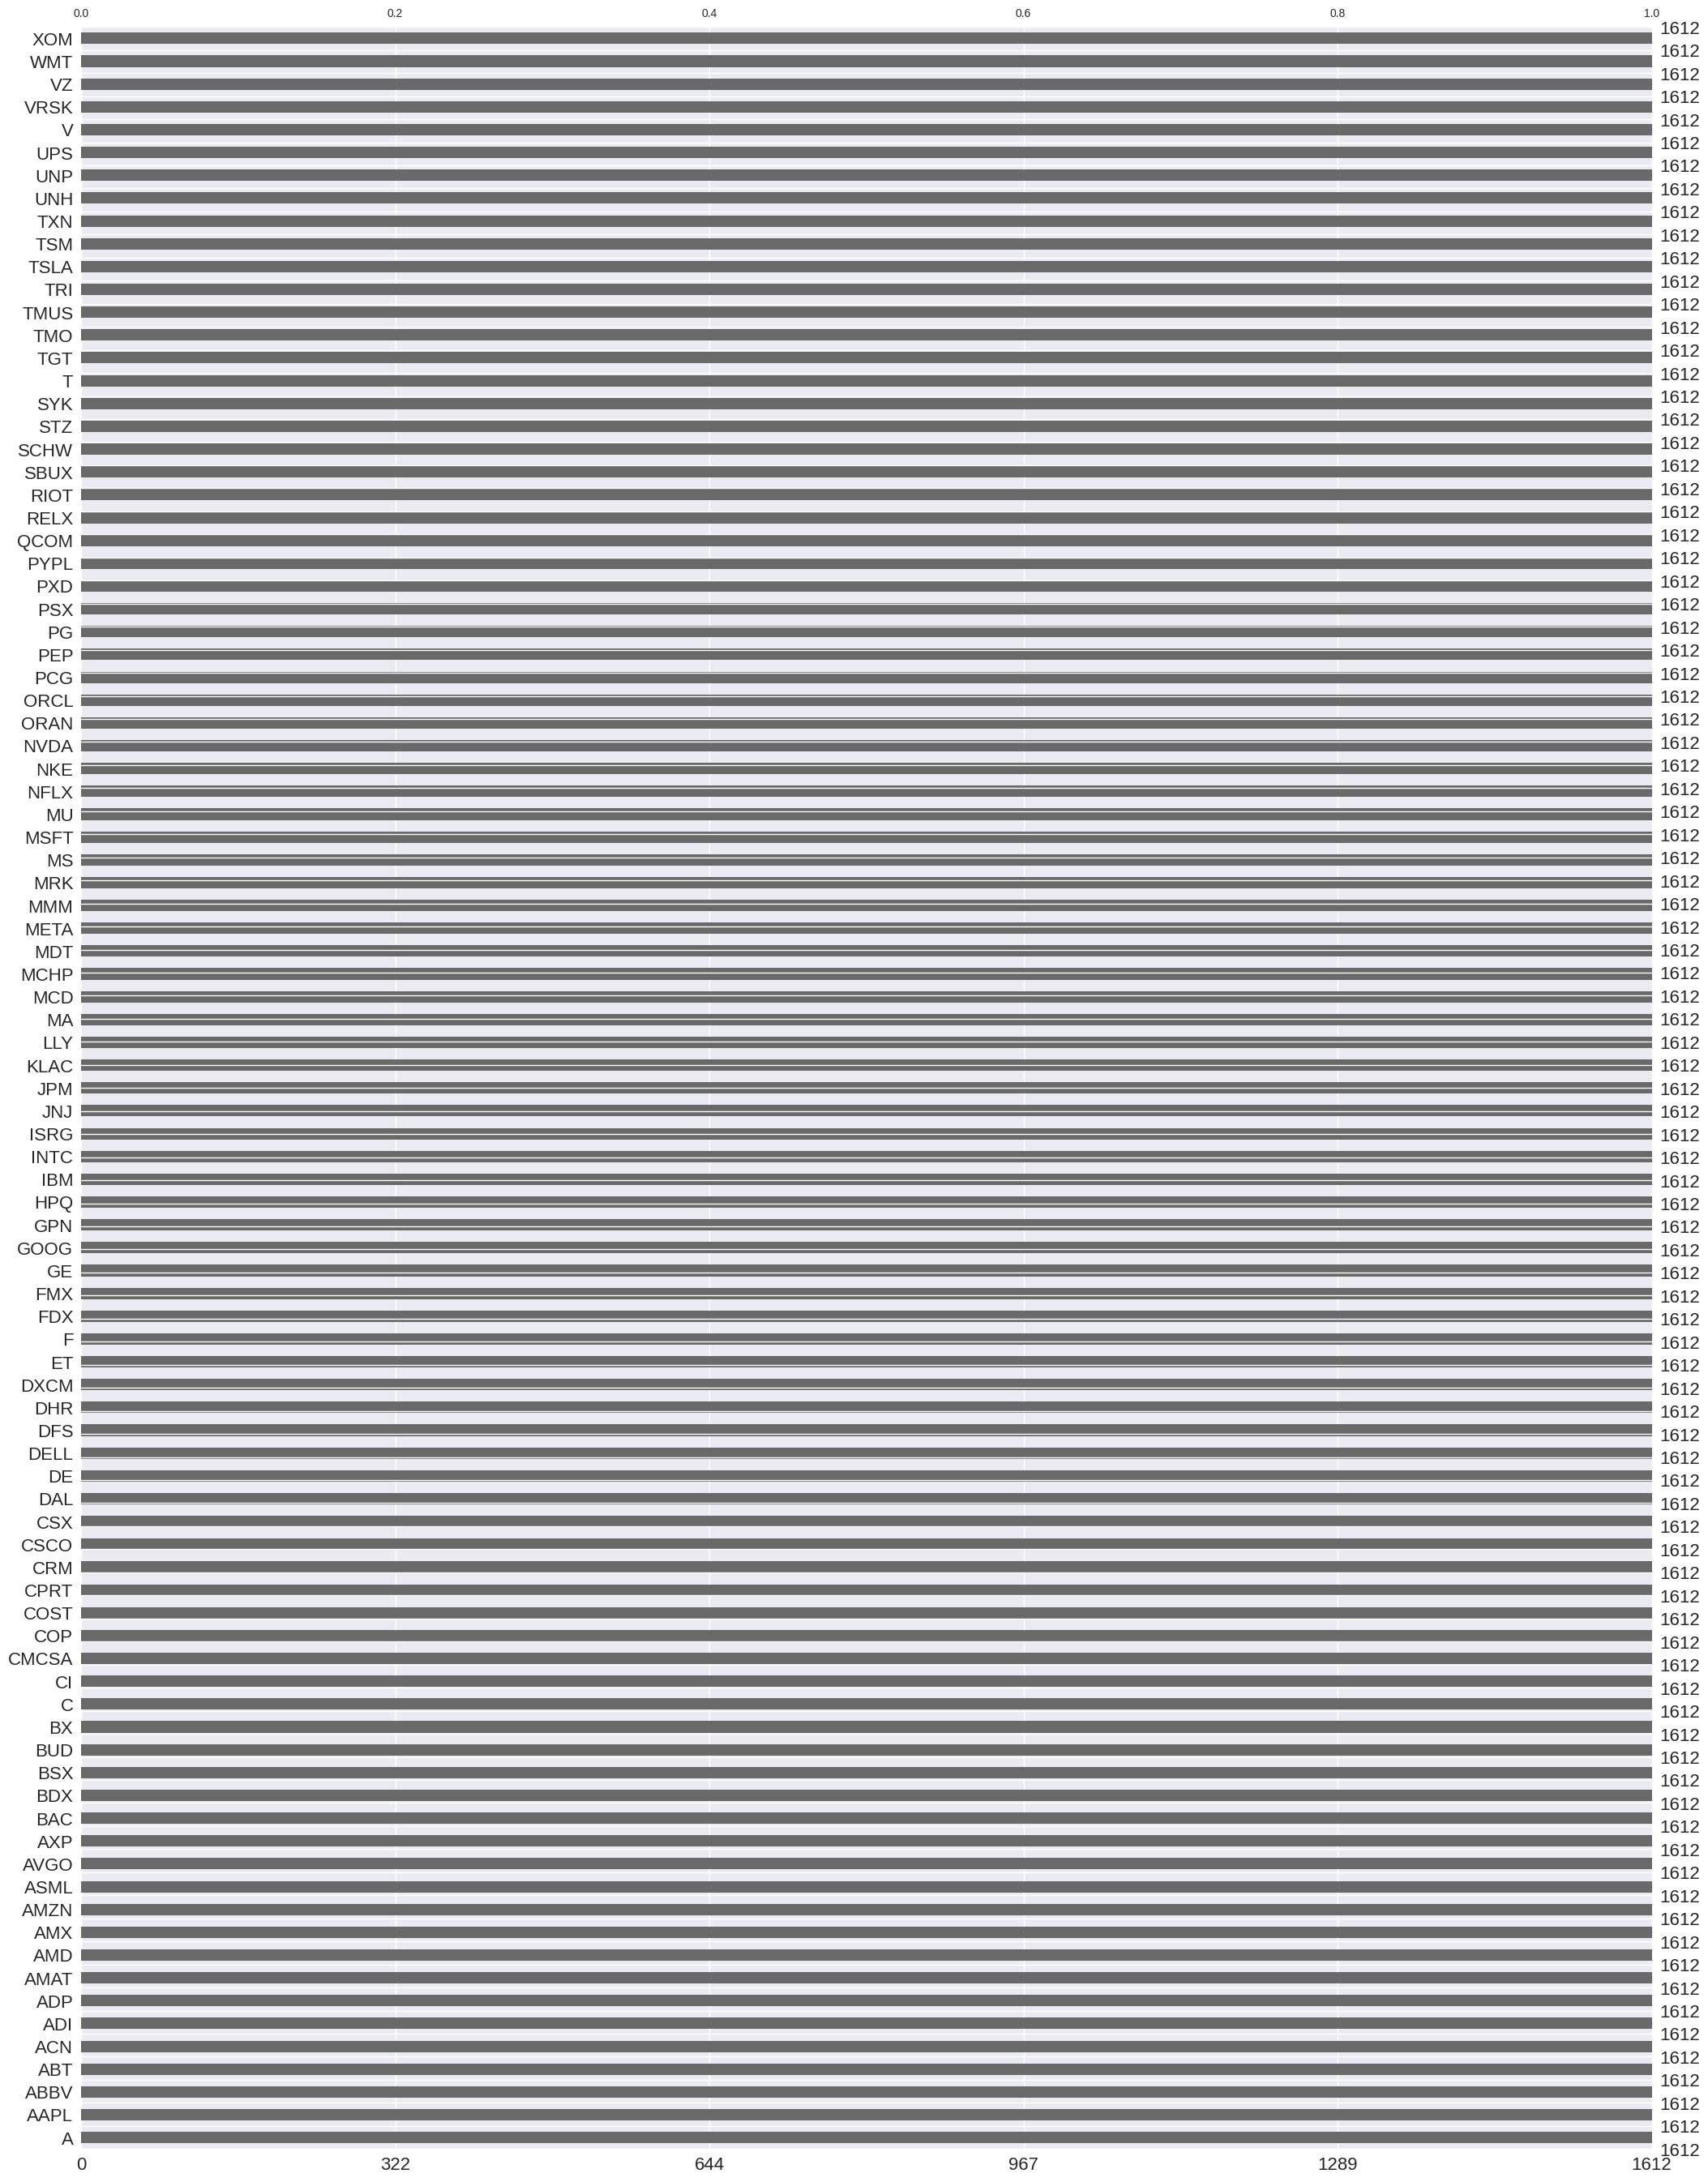

In [6]:
#check the missing value
msno.bar(stocksPrices)

## Pairs Selection

In [7]:
# split the formation period and trading period with prices and log returns
FS='2017-01-01'
FE='2021-12-30'
TS='2022-01-01'
TE='2023-05-31'

prices_formation = stocksPrices[FS:FE]
prices_trade = stocksPrices[TS:TE]
returns_formation = stockslogRet.loc[FS:FE]
returns_trade = stockslogRet.loc[TS:TE]

cumret=np.log(stocksPrices).diff().cumsum()+1
cumret.dropna(inplace=True)

cumret_selected=cumret.loc['2017-01-01':'2023-05-31']
cumret_selected = cumret_selected / cumret_selected.iloc[0]
train_selected = cumret_selected.loc[FS:FE] 
test_selected = cumret_selected.loc[TS:TE]

In [8]:
#Cointegration test
def CADF_pvalue(s1, s2, cumret):
  '''
  return the minimum p-value of tests of s1-s2 and s2-s1 pairs
  '''
  p1 = coint(cumret[s1], cumret[s2])[1]
  p2 = coint(cumret[s2], cumret[s1])[1]
  return min(p1,p2)

In [9]:
#half-life test
def half_life(spread):
  '''
  calculate halflife period of spread mean reversion
  we choose 1 week < halflife < 3 months
  '''
  ylag = spread.shift()
  deltay = spread - ylag
  ylag.dropna(inplace=True)
  deltay.dropna(inplace=True)
  residual=OLS(deltay, add_constant(ylag)).fit()
  halflife=-np.log(2)/residual.params[0]
  return halflife

In [10]:
def pairs_selection(train):
  metrics=['tau','Hurst Exponent','halflife']
  pairs=pd.DataFrame(columns=metrics)
  tested=[]
  for s1 in train.columns:
    for s2 in train.columns:
      if s1!=s2 and (f'{s1}-{s2}' not in tested) and (f'{s2}-{s1}' not in tested):
        tested.append(f'{s1}-{s2}')
        CADF_p = CADF_pvalue(s1,s2,train)
        if CADF_p<0.05:
          spread =train[s1] - train[s2]
          hurst = compute_Hc(spread)[0]
          if hurst<0.5:
            halflife = half_life(spread)
            if halflife>4 and halflife<60: #an earning period, quaterly
              tau=stats.kendalltau(train[s1], train[s2])[0]
              pairs.loc[f'{s1}-{s2}'] = [tau, hurst, halflife]
  return pairs

In [11]:
pairs=pairs_selection(train_selected)
pairs

,tau,Hurst Exponent,halflife
A-AVGO,0.830083,0.427451,22.658065
A-DE,0.794834,0.448450,49.436117
A-GOOG,0.831217,0.359300,27.100667
A-MCHP,0.698472,0.434337,42.971960
A-META,0.728639,0.426344,42.491038
...,...,...,...
SYK-UNP,0.820039,0.396847,31.957273
TGT-TSM,0.799337,0.424040,43.580924
UNP-VRSK,0.805207,0.416734,52.527372
V-VRSK,0.838432,0.419828,43.161527


In [12]:
pairs.sort_values(by='tau', ascending=False)

,tau,Hurst Exponent,halflife
DHR-TMO,0.926668,0.425325,49.258669
COST-TMO,0.890008,0.423231,40.322682
ADI-TXN,0.885306,0.392662,42.914369
ACN-ADI,0.870901,0.382619,39.551792
MSFT-TGT,0.870315,0.463822,35.081936
...,...,...,...
ET-FMX,0.451389,0.488310,58.654401
FMX-XOM,0.402499,0.474771,44.859666
IBM-T,0.304482,0.441163,57.314461
AMX-IBM,0.294956,0.453120,54.807847


In [13]:
def parse_pair(pair):
    s1 = pair[:pair.find('-')]
    s2 = pair[pair.find('-')+1:]
    return s1, s2

In [14]:
selected_stocks = []
selected_pairs = []

for pair in pairs.sort_values(by='tau', ascending=False).index:
  s1,s2 = parse_pair(pair)
  if (s1 not in selected_stocks) and (s2 not in selected_stocks):
    selected_stocks.append(s1)
    selected_stocks.append(s2)
    selected_pairs.append(pair)
  if len(selected_pairs) == 50: #we select 50 pairs in total
    break

In [15]:
print(selected_pairs)

['DHR-TMO', 'ADI-TXN', 'MSFT-TGT', 'ABT-VRSK', 'CRM-ISRG', 'CSX-UNP', 'COST-NKE', 'ADP-SYK', 'A-GOOG', 'AMD-DXCM', 'ACN-AVGO', 'V-WMT', 'QCOM-TSM', 'MCHP-META', 'ORCL-RELX', 'ET-XOM', 'CMCSA-MDT', 'DE-DELL', 'ABBV-MU', 'HPQ-SCHW', 'BSX-MRK', 'DAL-ORAN', 'BDX-VZ', 'IBM-T']


## Marginal Cumulative Distributed Function Fitting with Log Return Data of Selected Pairs

In [16]:
#reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
marginal_cdf=pd.DataFrame(columns=['Distribution','AIC','BIC','KS_pvalue'])

for stock in selected_stocks:
  data=returns_formation[stock]
  dists=['Normal','Student-t','Logistic','Extreme','logNormal','exponential']
  AIC=np.inf  #initialize AIC, we want to choose copula with minimum AIC
  for dist, name in zip([stats.norm, stats.t, stats.genlogistic, stats.genextreme, stats.lognorm, stats.expon], dists):
    params=dist.fit(data)
    dist_fit = dist(*params)
    loglikelihood = np.log(dist_fit.pdf(data)).sum() #AIC=-2L(𝜃)+2k
    aic = -2*loglikelihood + 2*len(params)
    if aic<AIC:
      best_dist = name
      AIC = aic
      BIC = -2*loglikelihood + len(params)*np.log(len(data)) #we want to choose copula with minimum BIC #BIC=-2ln(𝜃)+kln(N)
      KS_pvalue = stats.kstest(data, dist_fit.cdf, N=100)[1]
  marginal_cdf.loc[stock] = [best_dist, AIC, BIC, KS_pvalue]

In [17]:
marginal_cdf

,Distribution,AIC,BIC,KS_pvalue
DHR,Student-t,-7346.012409,-7330.602959,0.949363
TMO,Student-t,-7058.429033,-7043.019583,0.909467
ADI,Student-t,-6510.922738,-6495.513288,0.829381
TXN,Student-t,-6670.047357,-6654.637907,0.527084
MSFT,Student-t,-7001.109192,-6985.699743,0.762125
TGT,Student-t,-6839.395932,-6823.986483,0.974874
ABT,Student-t,-7221.569414,-7206.159964,0.636907
VRSK,Student-t,-7508.292122,-7492.882672,0.584561
CRM,Student-t,-6544.656720,-6529.247271,0.817652
ISRG,Student-t,-6578.681912,-6563.272463,0.326785


- The data shows all of selected stocks come from `student-t distribution`.

In [18]:
#check if there exist a stock with low KS_pvalue
marginal_cdf[marginal_cdf['KS_pvalue']<0.05]

,Distribution,AIC,BIC,KS_pvalue


- Hence, all samples from the same distribution. $H_0$ cannot be againsted.

## Fit Copulas and Find the Best One

In [33]:
class Copula:
    '''
    Parent class for copulas
    '''
    # parameters for calculating probabilities
    prob_sample_size = 10000000 # sample size
    prob_band = 0.005 # band size
    prob_sample = np.array([]) # sample     
    
    def loglikelihood(self, u1, u2):
        return np.log(self.pdf(u1,u2)).sum()
    
    def cdf_u1_given_u2(self, u1, u2): #conditional cdf1
        # generate sample if it does not exist
        if len(self.prob_sample) == 0:
            self.prob_sample = self.sample(size=self.prob_sample_size)
        # calculate conditional CDF
        s_u1 = self.prob_sample[:,0]
        s_u2 = self.prob_sample[:,1]
        condition = (s_u2 <= u2+self.prob_band/2) & (s_u2 >= u2-self.prob_band/2)
        sample_size = len(s_u1[condition])
        prob = (s_u1[condition] <= u1).sum() / sample_size
        return prob
    
    def cdf_u2_given_u1(self, u1, u2): #conditional cdf2
        # generate sample if it does not exist
        if len(self.prob_sample) == 0:
            self.prob_sample = self.sample(size=self.prob_sample_size)
        # calculate conditional CDF
        s_u1 = self.prob_sample[:,0]
        s_u2 = self.prob_sample[:,1]
        condition = (s_u1 <= u1+self.prob_band/2) & (s_u1 >= u1-self.prob_band/2)
        sample_size = len(s_u2[condition])
        prob = (s_u2[condition] <= u2).sum() / sample_size
        return prob

class GaussianCopula(Copula):
    name = 'Gaussian'
    num_params = 1
    
    def __init__(self, rho=0):
        self.rho = rho
        self.cov = np.array([[1,rho],[rho,1]])
        
    def cdf(self, u1, u2):
        data = np.vstack([stats.norm.ppf(u1),stats.norm.ppf(u2)]).T
        return stats.multivariate_normal(cov=self.cov).cdf(data)
    
    def pdf(self, u1, u2):
        a = np.sqrt(2) * erfinv(2*u1 - 1)
        b = np.sqrt(2) * erfinv(2*u2 - 1)
        n1 = 1/np.sqrt(1-self.rho**2)
        n2 = np.exp(-((a**2+b**2)*self.rho**2 - 2*a*b*self.rho)/ 2*(1-self.rho**2))
        return  n1*n2        
    
    def fit(self, u1, u2):
        tau = stats.kendalltau(u1,u2)[0]
        self.rho = np.sin(tau * np.pi/2)
        self.cov = np.array([[1,self.rho],[self.rho,1]])
    
    def sample(self, size=1):
        '''
        Generate sample from Gaussian copula
        Args:size (int): sample size
        Returns:numpy.ndarray: sample (size,2)
        '''
        smp = stats.multivariate_normal(cov=self.cov).rvs(size=size)
        u1 = stats.norm.cdf(smp[:,0])
        u2 = stats.norm.cdf(smp[:,1])
        sample = np.vstack([u1,u2]).T
        return sample
    
class ArchimedeanCopula(Copula):
    '''
    Parent class for Archimedean copulas
    '''    
    def sample(self, size=1):
        '''
        Generate sample from Archimedean copula using Kendall distribution function
        
        Args:size (int): sample size
            
        Returns:numpy.ndarray: sample (size,2)
        '''
        t1 = np.random.rand(size)
        t2 = np.random.rand(size)

        w = []
        for t in t2:
            func = lambda w: self.K(w) - t
            w.append(brentq(func, 0.0000000001, 0.9999999999))
        w = np.array(w).flatten()

        u1 = self.phi_inv(t1 * self.phi(w))
        u2 = self.phi_inv((1-t1) * self.phi(w))
        sample = np.vstack([u1,u2]).T
        
        return sample
    
class ClaytonCopula(ArchimedeanCopula):
    name = 'Clayton'
    alpha_bounds = (-1,20)
    num_params = 1
    
    def __init__(self, alpha=-1):
        '''
        Initialize Clayton copula object
        
        Args:alpha: copula parameter alpha
        '''
        self.alpha = alpha
        
    def phi(self, t):
        '''
        Compute generator function for Clayton copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns:numpy.ndarray: value of generator function (n_samples,)
        '''
        alpha = self.alpha
        return 1/alpha * (t**(-alpha) - 1)
    
    def phi_inv(self, t):
        '''
        Compute inverse generator function for Clayton copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns:numpy.ndarray: value of inverse generator function (n_samples,)
        '''
        alpha = self.alpha
        return (alpha * t + 1)**(-1/alpha)
    
    def K(self, t):
        '''
        Compute Kendall distribution function for Clayton copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns:numpy.ndarray: value of Kendall distribution function (n_samples,)
        '''
        alpha = self.alpha
        return t * (alpha - t**alpha + 1) / alpha
        
        
    def cdf(self, u1, u2):
        alpha=self.alpha
        return (u1**(-alpha) + u2**(-alpha) - 1)**(-1/alpha)
    
    def pdf(self, u1, u2):
        alpha=self.alpha
        num = (u1**(-alpha) * u2**(-alpha) * (alpha+1) * (-1 + u2**(-alpha) + u1**(-alpha))**(-1/alpha))
        denom = u1 * u2 * (-1 + u2**(-alpha) + u1**(-alpha))**2
        return num/denom
    
    def fit(self, u1, u2, method='cml'):
        '''
        Fit Clayton copula to data
        '''
        if method=='tau':
            tau = stats.kendalltau(u1,u2)[0]
            self.alpha = 2 * tau / (1 - tau)
        elif method=='cml':
            def fn_to_minimize(alpha, u1, u2):
                self.alpha = alpha
                return -self.loglikelihood(u1,u2)
            self.alpha = minimize_scalar(fn_to_minimize, args=(u1, u2), bounds=self.alpha_bounds, method='bounded')['x']

class GumbelCopula(ArchimedeanCopula):
    name = 'Gumbel'
    alpha_bounds = (-1,20)
    num_params = 1
    
    def __init__(self, alpha=-1):
        '''
        Initialize Gumbel copula object
        
        Args:alpha: copula parameter alpha
        '''
        self.alpha = alpha
        
    def phi(self, t):
        '''
        Compute generator function for Gumbel copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns:numpy.ndarray: value of generator function (n_samples,)
        '''
        alpha = self.alpha
        return (-np.log(t))**alpha
    
    def phi_inv(self, t):
        '''
        Compute inverse generator function for Gumbel copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns:numpy.ndarray: value of inverse generator function (n_samples,)
        '''
        alpha = self.alpha
        return np.exp(-t**(1/alpha))
    
    def K(self, t):
        '''
        Compute Kendall distribution function for Gumbel copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns:numpy.ndarray: value of Kendall distribution function (n_samples,)
        '''
        alpha = self.alpha
        return t * (alpha - np.log(t)) / alpha
        
    def cdf(self, u1, u2):
        alpha=self.alpha
        return np.exp(-((-np.log(u1))**alpha + (-np.log(u2))**alpha) ** (1/alpha))
    
    def pdf(self, u1, u2):
        alpha=self.alpha
        num1 = (-np.log(u1))**alpha * (-np.log(u2))**alpha * ((-np.log(u1))**alpha + (-np.log(u2))**alpha)**(1/alpha)
        num2 = alpha + ((-np.log(u1))**alpha + (-np.log(u2))**alpha)**(1/alpha) - 1
        num3 = np.exp(-((-np.log(u1))**alpha + (-np.log(u2))**alpha)**(1/alpha))
        denom = u1 * u2 * ((-np.log(u1))**alpha + (-np.log(u2))**alpha)**2 * np.log(u1) * np.log(u2)
        return (num1 * num2 * num3) / denom
    
    def fit(self, u1, u2, method='cml'):
        '''
        Fit Gumbel copula to data
        
        Args:
            x (numpy.ndarray): input (uniform) data with shape (n_samples,)
            y (numpy.ndarray): input (uniform) data with shape (n_samples,)
        '''
        if method=='tau':
            tau = stats.kendalltau(u1,u2)[0]
            self.alpha = 1 / (1 - tau)
        elif method=='cml':
            def fn_to_minimize(alpha, u1, u2):
                self.alpha = alpha
                return -self.loglikelihood(u1,u2)
            self.alpha = minimize_scalar(fn_to_minimize, args=(u1, u2), bounds=self.alpha_bounds, method='bounded')['x']
            
class FrankCopula(ArchimedeanCopula):
    name = 'Frank'
    alpha_bounds = (-20,20)
    num_params = 1
    
    def __init__(self, alpha=-1):
        '''
        Initialize Frank copula object
        
        Args:alpha: copula parameter alpha
        '''
        self.alpha = alpha
        
    def phi(self, t):
        '''
        Compute generator function for Frank copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns:numpy.ndarray: value of generator function (n_samples,)
        '''
        alpha = self.alpha
        return -np.log((np.exp(-alpha*t) - 1) / (np.exp(-alpha) - 1))
    
    def phi_inv(self, t):
        '''
        Compute inverse generator function for Frank copula
        Args:t (numpy.ndarray): input data with shape (n_samples,)
        Returns:numpy.ndarray: value of inverse generator function (n_samples,)
        '''
        alpha = self.alpha
        return -1/alpha * np.log((np.exp(-alpha) - 1) / np.exp(t) + 1)
    
    def K(self, t):
        '''
        Compute Kendall distribution function for Frank copula
        Args:t (numpy.ndarray): input data with shape (n_samples,)
        Returns:numpy.ndarray: value of Kendall distribution function (n_samples,)
        '''
        alpha = self.alpha
        return (t + (1 - np.exp(alpha*t)) * np.log((1-np.exp(alpha*t)) * np.exp(-alpha*t+alpha) / (1-np.exp(alpha))) / alpha)
        
    def cdf(self, u1, u2):
        alpha=self.alpha
        return -1/alpha * np.log(1 + (np.exp(-alpha*u1)-1) * (np.exp(-alpha*u2)-1) / (np.exp(-alpha)-1))
    
    def pdf(self, u1, u2):
        alpha=self.alpha
        num = alpha * (np.exp(alpha) - 1) * np.exp(alpha * (u1 + u2 + 1))
        denom = (-(np.exp(alpha) - 1) * np.exp(alpha * (u1 + u2)) + (np.exp(alpha*u1)-1) * (np.exp(alpha*u2)-1) * np.exp(alpha))**2
        return num/denom
    
    def fit(self, u1, u2, method='cml'):
        if method=='tau':
            raise NotImplementedError
        elif method=='cml':
            def fn_to_minimize(alpha, u1, u2):
                self.alpha = alpha
                return -self.loglikelihood(u1,u2)
            self.alpha = minimize_scalar(fn_to_minimize, args=(u1, u2), bounds=self.alpha_bounds, method='bounded')['x']

class JoeCopula(ArchimedeanCopula):
    name = 'Joe'
    alpha_bounds = (1,20)
    num_params = 1
    
    def __init__(self, alpha=1):
        self.alpha = alpha
        
    def phi(self, t):
        '''
        Compute generator function for Joe copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns:numpy.ndarray: value of generator function (n_samples,)
        '''
        alpha = self.alpha
        return -np.log(1 - (1-t)**alpha)
    
    def phi_inv(self, t):
        '''
        Compute inverse generator function for Joe copula
        Args:t (numpy.ndarray): input data with shape (n_samples,)
        Returns:numpy.ndarray: value of inverse generator function (n_samples,)
        '''
        alpha = self.alpha
        return 1 - (1 - np.exp(-t))**(1/alpha)
    
    def K(self, t):
        '''
        Compute Kendall distribution function for Joe copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns:numpy.ndarray: value of Kendall distribution function (n_samples,)
        '''
        alpha = self.alpha
        return (1/alpha * (1-t)**(-alpha) * (alpha*t*(1-t)**alpha - (t-1) * ((1-t)**alpha-1) * np.log(1 - (1-t)**alpha)))
        
    def cdf(self, u1, u2):
        alpha=self.alpha
        return 1 - ((1-u1)**alpha + (1-u2)**alpha - (1-u1)**alpha * (1-u2)**alpha) ** (1/alpha)
    
    def pdf(self, u1, u2):
        alpha = self.alpha
        
        # fix numerical issues:
        u1[u1==1] = 0.999999999
        u1[u1==0] = 0.000000001
        u2[u2==1] = 0.999999999
        u2[u2==0] = 0.000000001

        n1 = (1-u1)**(alpha-1) * (1-u2)**(alpha-1)
        n2 = (-(1-u1)**alpha * (1-u2)**alpha + (1-u1)**alpha + (1-u2)**alpha) ** (-2 + 1/alpha)
        n3 = (alpha * ((1-u1)**alpha - 1) * ((1-u2)**alpha - 1) + alpha*(-(1-u1)**alpha * (1-u2)**alpha + (1-u1)**alpha + (1-u2)**alpha) - ((1-u1)**alpha-1) * ((1-u2)**alpha - 1))
        return n1 * n2 * n3
    
    def fit(self, u1, u2, method='cml'):
        if method=='tau':
            raise NotImplementedError
        elif method=='cml':
            def fn_to_minimize(alpha, u1, u2):
                self.alpha = alpha
                return -self.loglikelihood(u1,u2)
            self.alpha = minimize_scalar(fn_to_minimize, args=(u1, u2), bounds=self.alpha_bounds, method='bounded')['x']

class N13Copula(ArchimedeanCopula):
    name = 'N13'
    alpha_bounds = (0,20)
    num_params = 1
    
    def __init__(self, alpha=1):
        self.alpha = alpha
        
    def phi(self, t): #t: input data wth shape(n_samples,)
        '''
        Compute generator function for N13 copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns:numpy.ndarray: value of generator function (n_samples,)
        '''
        alpha = self.alpha
        return (1 - np.log(t))**alpha - 1
    
    def phi_inv(self, t):
        '''
        Compute inverse generator function for N13 copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns: numpy.ndarray: value of inverse generator function (n_samples,)
        '''
        alpha = self.alpha
        return np.exp(1 - (t+1)**(1/alpha))
    
    def K(self, t):
        '''
        Compute Kendall distribution function for N13 copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns: numpy.ndarray: value of Kendall distribution function (n_samples,)
        '''
        alpha = self.alpha
        return (t/alpha * (1-np.log(t))**(-alpha) * (alpha * (1-np.log(t))**alpha - ((1-np.log(t))**alpha - 1) * (np.log(t) - 1)))
        
    def cdf(self, u1, u2):
        alpha=self.alpha
        return np.exp(1 - ((1-np.log(u1))**alpha + (1-np.log(u2))**alpha - 1) ** (1/alpha))
    
    def pdf(self, u1, u2):
        alpha = self.alpha

        n1 = (1-np.log(u1))**alpha * (1-np.log(u2))**alpha
        n2 = (alpha + ((1-np.log(u1))**alpha + (1-np.log(u2))**alpha - 1) ** (1/alpha) - 1)
        n3 = ((1-np.log(u1))**alpha + (1-np.log(u2))**alpha - 1) ** (1/alpha)
        n4 = np.exp(1 - ((1-np.log(u1))**alpha + (1-np.log(u2))**alpha - 1) ** (1/alpha))
        d = u1 * u2 * (np.log(u1)-1) * (np.log(u2)-1) * ((1-np.log(u1))**alpha + (1-np.log(u2))**alpha - 1)**2
        
        return n1*n2*n3*n4 / d
    
    def fit(self, u1, u2, method='cml'):
        if method=='tau':
            raise NotImplementedError
        elif method=='cml':
            def fn_to_minimize(alpha, u1, u2):
                self.alpha = alpha
                return -self.loglikelihood(u1,u2)
            self.alpha = minimize_scalar(fn_to_minimize, args=(u1, u2), bounds=self.alpha_bounds, method='bounded')['x']

class N14Copula(ArchimedeanCopula):
    name = 'N14'
    alpha_bounds = (1,20)
    num_params = 1
    
    def __init__(self, alpha=1):
        self.alpha = alpha
        
    def phi(self, t):
        '''
        Compute generator function for N14 copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns:numpy.ndarray: value of generator function (n_samples,)
        '''
        alpha = self.alpha
        return (t**(-1/alpha) - 1)**alpha
    
    def phi_inv(self, t):
        '''
        Compute inverse generator function for N14 copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns: numpy.ndarray: value of inverse generator function (n_samples,)
        '''
        alpha = self.alpha
        return (t**(1/alpha) + 1)**(-alpha)
    
    def K(self, t):
        '''
        Compute Kendall distribution function for N14 copula
        
        Args:t (numpy.ndarray): input data with shape (n_samples,)
            
        Returns:numpy.ndarray: value of Kendall distribution function (n_samples,)
        '''
        alpha = self.alpha
        return t * (2 - t**(1/alpha))
        
    def cdf(self, u1, u2):
        alpha=self.alpha
        return (1 + ((u1**(-1/alpha)-1)**alpha + (u2**(-1/alpha)-1)**alpha)**(1/alpha))**(-alpha)
    
    def pdf(self, u1, u2):
        alpha = self.alpha

        a = u1**(-1/alpha) * (1 - u1**(1/alpha))
        b = u2**(-1/alpha) * (1 - u2**(1/alpha))
        n1 = (a**alpha * b**alpha * (a**alpha + b**alpha)**((1-2*alpha)/alpha) * ((a**alpha + b**alpha)**(1/alpha) + 1)**(-2-alpha))
        n2 = alpha * (a**alpha + b**alpha)**(1/alpha) + alpha * ((a**alpha + b**alpha)**(1/alpha) + 1) - 1
        d = alpha * u1 * u2 * (u1**(1/alpha) - 1) * (u2**(1/alpha) - 1)
        return n1 * n2 / d
        
    
    def fit(self, u1, u2, method='cml'):
        if method=='tau':
            raise NotImplementedError
        elif method=='cml':
            def fn_to_minimize(alpha, u1, u2):
                self.alpha = alpha
                return -self.loglikelihood(u1,u2)
            self.alpha = minimize_scalar(fn_to_minimize, args=(u1, u2), bounds=self.alpha_bounds, method='bounded')['x']     

In [35]:
copulas=pd.DataFrame(columns=['copula','parameter','AIC','BIC','KS_pvalue'], index=selected_pairs)

for pair in selected_pairs:
  s1, s2 = parse_pair(pair)
  #fit marginal with student-t distribution
  param_s1=stats.t.fit(returns_formation[s1])
  dist_s1=stats.t(*param_s1)
  param_s2=stats.t.fit(returns_formation[s2])
  dist_s2=stats.t(*param_s2)
  #cdf
  u1=dist_s1.cdf(returns_formation[s1])
  u2=dist_s2.cdf(returns_formation[s2])

  AIC=np.inf
  for copula in [GaussianCopula(), ClaytonCopula(), GumbelCopula(), FrankCopula(), JoeCopula(), N13Copula(), N14Copula()]:
    copula.fit(u1, u2)
    Loglikelihood = copula.loglikelihood(u1, u2)
    aic = -2*Loglikelihood + 2*copula.num_params
    if aic < AIC: #we always select the pairs with smaller AIC
      AIC = aic #update
      BIC = copula.num_params * np.log(len(u1)) - 2 * Loglikelihood
      COPULA = copula.name
      #KS_pvalue Calculation
      sample = copula.sample(size=len(u1))
      s_u1 = sample[:, 0]
      s_u2 = sample[:, 1]
      KS_pvalue = ndtest.ks2d2s(u1, u2, s_u1, s_u2)

      if isinstance(copula, ArchimedeanCopula):
        param = copula.alpha
      else:
        param = copula.rho
  copulas.loc[pair] = [COPULA, param, AIC, BIC, KS_pvalue]

<ipython-input-33-69809ff94e50>:11: RuntimeWarning: invalid value encountered in log
  return np.log(self.pdf(u1,u2)).sum()
<ipython-input-33-69809ff94e50>:171: RuntimeWarning: invalid value encountered in power
  num = (u1**(-alpha) * u2**(-alpha) * (alpha+1) * (-1 + u2**(-alpha) + u1**(-alpha))**(-1/alpha))


In [36]:
copulas

,copula,parameter,AIC,BIC,KS_pvalue
DHR-TMO,N14,1.736199,-1167.046056,-1161.909573,0.390736
ADI-TXN,N14,2.120035,-1538.559797,-1533.423314,0.272244
MSFT-TGT,Gumbel,1.23756,-135.389547,-130.253063,0.468589
ABT-VRSK,Gumbel,1.520992,-401.421837,-396.285354,0.239624
CRM-ISRG,N14,1.288981,-624.966363,-619.82988,0.119775
CSX-UNP,N14,1.808643,-1248.12617,-1242.989687,0.612365
COST-NKE,N13,2.297221,-241.035204,-235.898721,0.209556
ADP-SYK,Gumbel,1.588629,-465.590218,-460.453735,0.026373
A-GOOG,N14,1.149311,-452.074789,-446.938305,0.508966
AMD-DXCM,N13,1.979645,-149.141725,-144.005241,0.350746


In [37]:
copulas[copulas['KS_pvalue']<0.05]

,copula,parameter,AIC,BIC,KS_pvalue
ADP-SYK,Gumbel,1.588629,-465.590218,-460.453735,0.026373


- The table shows that our best fitted copulas come from Gumbel, Clayton, N13, N14 Copula distribution.
- `ADP-SYK` pair of stocks has KS_pvalue < 0.5. Most of them from the same distribution.

## Generate Trading Signals

### Strategy1